In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("./Video_Games_Sales_as_at_22_Dec_2016.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


We was thinking that critic score will be one of the main features.

    -Droping games without a year of release or genre
    -Renaming columns for ease of use
    -Creating a new column for age of the game

In [6]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2021 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,14.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,1.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,11.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,14.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,18.000000


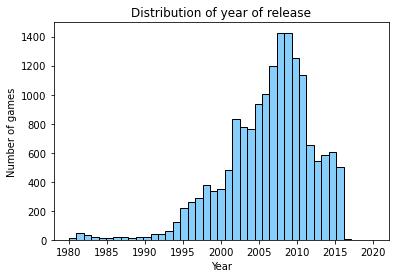

In [7]:
# Histogram plot of Year of release
num_years = data["Year"].max() - data["Year"].min() + 1
plt.hist(data["Year"], bins=num_years, color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

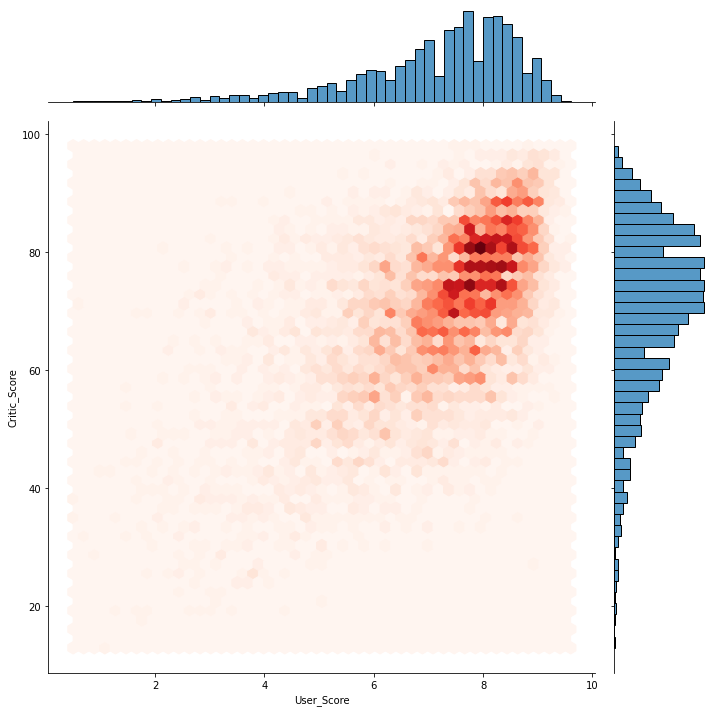

In [8]:
# Replacing "tbd" values with np.nan and transforming column to float type
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)

g = sns.jointplot(x="User_Score", y="Critic_Score", data=data, cmap="Reds", kind="hex", 
                  height=10);
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

#### Next We want to see how many values there are missing in each column. We are using a function We found in one of [William Koehrsen](https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering) blogs on Medium.

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8985,54.6
User_Count,8985,54.6
Critic_Score,8465,51.5
Critic_Count,8465,51.5
Rating,6679,40.6
Developer,6541,39.8
Publisher,32,0.2


In [11]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [12]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.144688,0.072628,0.047301,0.024357,0.289258,67.779028,24.518117,7.079976,111.325033,14.407376
std,5.758078,0.210709,0.131408,0.130786,0.050152,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,11.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,20.000000,7.400000,21.000000,14.000000
75%,2010.000000,0.190000,0.080000,0.030000,0.030000,0.380000,78.000000,34.000000,8.200000,61.000000,18.000000
max,2020.000000,1.670000,1.580000,1.650000,1.180000,1.690000,98.000000,106.000000,9.700000,10665.000000,41.000000


In [13]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

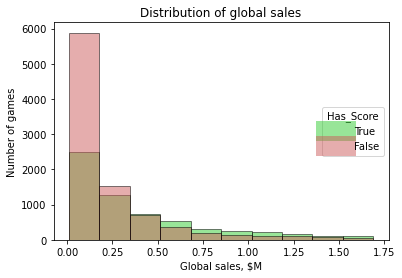

In [14]:
from matplotlib.lines import Line2D
plt.hist(data[data["Has_Score"]==True]["Global"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Global"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=7);

### Model_v2 :
    - drop game without score (critic or user)
    - use scores to predict sales

In [15]:
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000
mean,2007.422682,0.209774,0.112472,0.029221,0.039420,0.391119,68.976047,26.910706,7.139661,118.897181,13.577318
std,4.171197,0.231764,0.154954,0.094207,0.059871,0.389871,13.627623,17.416288,1.450253,424.446207,4.171197
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,5.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.100000,61.000000,13.000000,6.400000,10.000000,11.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,23.000000,7.500000,23.000000,14.000000
75%,2010.000000,0.290000,0.150000,0.000000,0.050000,0.560000,79.000000,37.000000,8.200000,66.000000,17.000000
max,2016.000000,1.670000,1.580000,1.390000,1.180000,1.690000,98.000000,106.000000,9.600000,10665.000000,36.000000


In [16]:
scored

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score
1059,SOCOM 3: U.S. Navy SEALs,PS2,2005,Shooter,Sony Computer Entertainment,1.22,0.34,0.04,0.10,1.69,82.0,59.0,8.8,64.0,Zipper Interactive,M,16,True
1060,BioShock Infinite,PS3,2013,Shooter,Take-Two Interactive,0.72,0.65,0.04,0.28,1.69,94.0,27.0,8.5,1863.0,Irrational Games,M,8,True
1065,Harry Potter and the Sorcerer's Stone,GBA,2001,Action,Electronic Arts,0.87,0.66,0.08,0.08,1.69,64.0,8.0,7.1,7.0,Griptonite Games,E,20,True
1066,Dragon Ball Z: The Legacy of Goku,GBA,2002,Role-Playing,Infogrames,1.52,0.12,0.00,0.05,1.69,53.0,15.0,6.9,28.0,Webfoot Technologies,E,19,True
1068,Resident Evil 4,GC,2005,Action,Capcom,0.98,0.42,0.22,0.06,1.69,96.0,82.0,9.4,767.0,Capcom,M,16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,20,True
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,19,True
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,7,True
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,10,True


Remove outliers in User_Count column.

In [17]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.205403,0.098572,0.028995,0.036368,0.369597,67.815866,24.958439,7.124575,37.459523,13.944163
std,4.010373,0.225580,0.138941,0.095492,0.056428,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,5.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,60.000000,13.000000,6.400000,9.000000,11.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.230000,70.000000,22.000000,7.400000,20.000000,14.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.047500,0.520000,78.000000,34.000000,8.200000,45.000000,17.000000
max,2016.000000,1.670000,1.160000,1.390000,1.130000,1.690000,98.000000,91.000000,9.600000,233.000000,36.000000


Numeric Column - age

one-hot encoded categorical columns - platform, genre, rating

In [18]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

In [19]:
categorical_subset

,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,Platform_7,Platform_8,Platform_9,Platform_10,...,Genre_8,Genre_9,Genre_10,Genre_11,Genre_12,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
1059,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1065,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1066,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1071,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1075,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16667,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16677,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
features

,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age,Platform_1,Platform_2,Platform_3,Platform_4,...,Genre_8,Genre_9,Genre_10,Genre_11,Genre_12,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5
1059,1.69,82.0,59.0,8.8,64.0,16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1065,1.69,64.0,8.0,7.1,7.0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1066,1.69,53.0,15.0,6.9,28.0,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1071,1.68,64.0,62.0,5.9,104.0,13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1075,1.68,82.0,50.0,7.9,135.0,13,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16656,0.01,81.0,46.0,8.5,151.0,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16667,0.01,46.0,4.0,2.4,21.0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
16677,0.01,81.0,12.0,8.8,9.0,19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16700,0.01,61.0,12.0,5.8,43.0,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
correlations.head(5)

Platform_5    -0.186725
Genre_10      -0.094686
Genre_12      -0.084227
Platform_17   -0.069683
Platform_15   -0.062370
Name: Global, dtype: float64

In [22]:
correlations.tail(5)

User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global          1.000000
Name: Global, dtype: float64

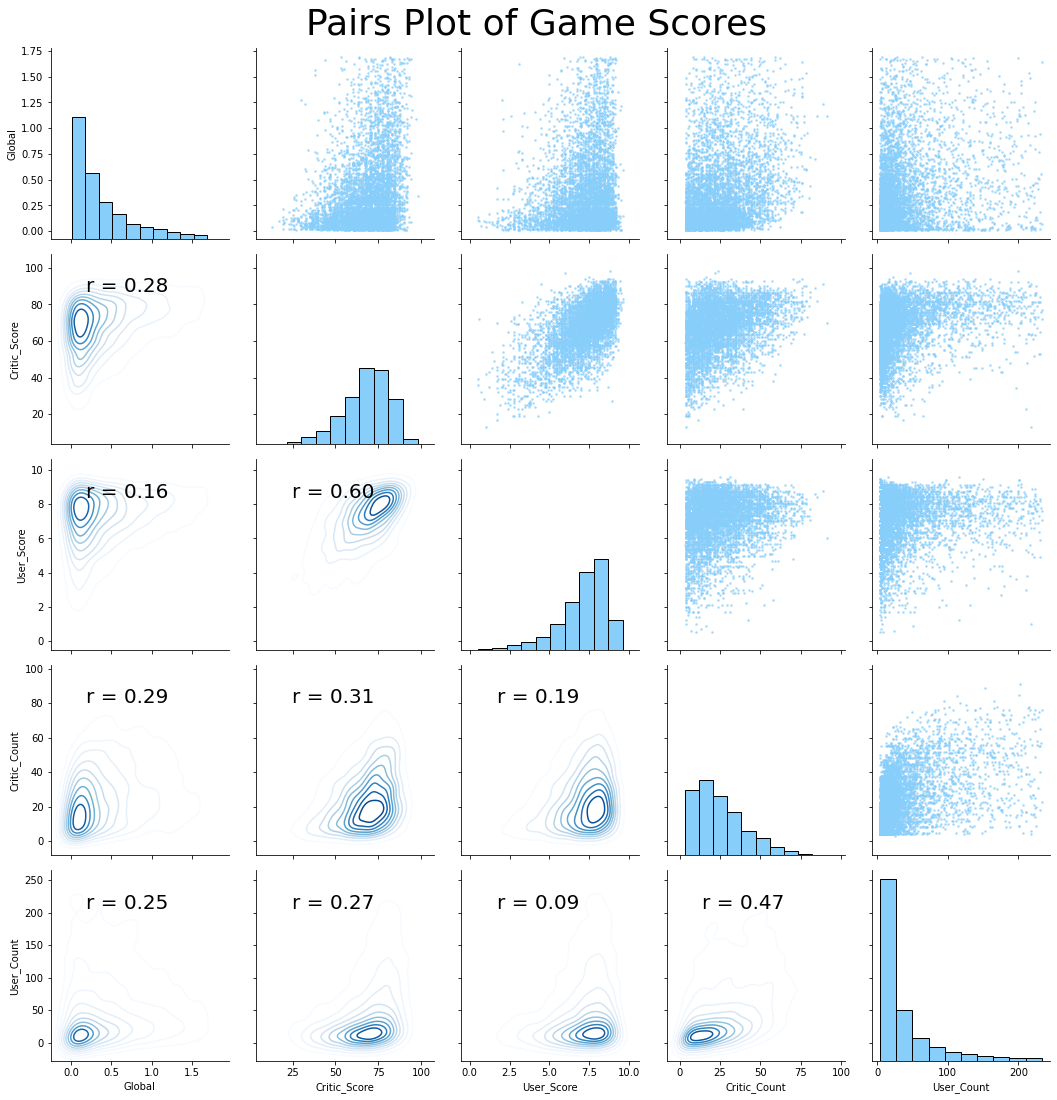

In [23]:
# Extract the columns to  plot
plot_data = features[["Global", "Critic_Score", "User_Score",
                      "Critic_Count", "User_Count"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = "lightskyblue", alpha = 0.6, marker=".", s=10)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = "lightskyblue", edgecolor="black")

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Title for entire plot
plt.suptitle("Pairs Plot of Game Scores", size = 36, y = 1.02);

In [24]:
features.shape

(5534, 40)

There are 39 features (1 is target) in the dataset after feature engineering and selection.

Splitting data into train and test sets.

In [25]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4427, 39)
(1107, 39)
(4427,)
(1107,)


In [26]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [27]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print(baseline_guess)
print(basic_baseline_mae)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

0.23
0.2787353206865403
Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2787


We will compare several simple models with different types of regression, and then focus on the best one for hyperparameter tuning. 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [1]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    print(model_pred)
    # Return the performance metric
#     return model_mae
    return model_mae

In [2]:
from sklearn.linear_model import LinearRegression, Ridge
lr = LinearRegression()

In [3]:
lr_mae = fit_and_evaluate(lr)
#print(np.mean(lr_mae))
print("Linear Regression Performance on the test set: MAE = {:.04f}".format(np.mean(lr_mae)))

NameError: name 'features_train' is not defined

#### what should be a good value for K

In [32]:
knn_maelst = []
for i in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn_mae = fit_and_evaluate(knn)
    knn_maelst.append(knn_mae)
print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))


[1.07 0.07 1.57 ... 0.55 0.03 0.05]
[0.7   0.31  1.065 ... 0.375 0.425 0.13 ]
[0.73333333 0.43333333 1.16       ... 0.44       0.29       0.24      ]
[0.555  0.3425 1.03   ... 0.3625 0.26   0.235 ]
[0.62  0.328 1.048 ... 0.33  0.228 0.202]
[0.53833333 0.35       0.94166667 ... 0.285      0.295      0.18333333]
[0.47857143 0.35571429 0.84571429 ... 0.29857143 0.32       0.16714286]
[0.4325  0.3775  0.87375 ... 0.2775  0.31    0.15875]
[0.39888889 0.36333333 0.78555556 ... 0.26222222 0.41111111 0.16      ]
[0.378 0.461 0.835 ... 0.317 0.523 0.145]
[0.35636364 0.46727273 0.78090909 ... 0.29818182 0.48909091 0.13363636]
[0.33083333 0.43       0.7575     ... 0.2875     0.44916667 0.125     ]
[0.31461538 0.40384615 0.77538462 ... 0.27769231 0.47692308 0.12153846]
[0.33428571 0.38285714 0.82928571 ... 0.26214286 0.50928571 0.15571429]
[0.32866667 0.43933333 0.798      ... 0.254      0.52333333 0.16333333]
[0.32375  0.429375 0.775625 ... 0.240625 0.55     0.188125]
[0.30647059 0.42352941 0.781

In [33]:
knntest = KNeighborsRegressor(n_neighbors=3)
knn_mae = fit_and_evaluate(knntest)

[0.73333333 0.43333333 1.16       ... 0.44       0.29       0.24      ]


Text(0, 0.5, 'Error Rate')

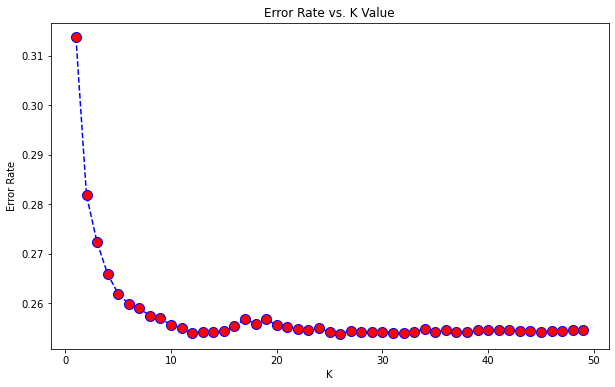

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),knn_maelst,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Find index of lowest knn mae 

In [35]:
a = np.array(knn_maelst)
print(np.where(a == a.min()))
knn_mae = a.min()
a.min()

(array([25], dtype=int64),)


0.2537686748662359

# add more in order to have graph like the example


In [36]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

[0.61066599 0.46274504 0.79851104 ... 0.3802758  0.43199165 0.19494189]
Support Vector Machine Regression Performance on the test set: MAE = 0.2859


In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

[0.3871 0.5589 0.4562 ... 0.3149 0.0314 0.1553]
Random Forest Regression Performance on the test set: MAE = 0.2216


In [38]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

[0.41653543 0.45050993 0.5674985  ... 0.29374336 0.06267986 0.1195611 ]
Gradient Boosting Regression Performance on the test set: MAE = 0.2197


In [39]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

[0.37183863 0.29790822 0.53659516 ... 0.27804329 0.28014375 0.23736146]
Ridge Regression Performance on the test set: MAE = 0.2354


### Create Mode coparison ( LR vs KNN vs Baseline )

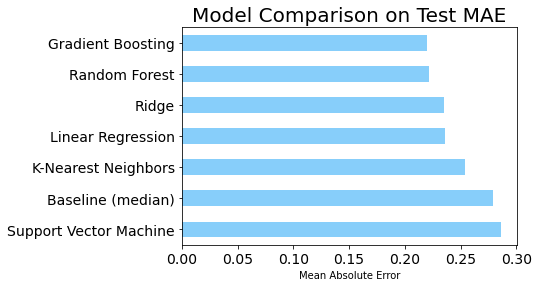

In [40]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

Gradient Bossting seems to be the best model

# Continue by hrs

In [41]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [47]:
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True)
                   


In [48]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.4s finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

We are printing out 10 best estimators found by randomized search.

In [49]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
13,-0.198849,lad,10,4,4,auto
19,-0.198920,lad,10,2,6,auto
18,-0.200978,lad,10,1,2,log2
2,-0.204665,lad,3,8,2,None
9,-0.206356,huber,10,6,6,auto
1,-0.207596,ls,10,6,2,log2
4,-0.207716,ls,5,8,4,auto
15,-0.208372,huber,10,4,10,None
8,-0.208379,ls,5,6,6,None
3,-0.208624,ls,5,8,2,sqrt


In [50]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='lad', max_depth=10, max_features='auto',
                          min_samples_leaf=4, min_samples_split=4,
                          random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(features_train, target_train);


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.2s finished


Now we want to see that did the numbers of trees is going to effects the performance or not in this case.

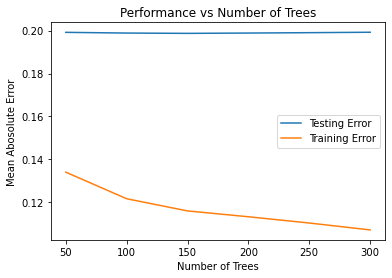

In [52]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

The graph shows that the model is overfitting. Training error keeps decreasing, while test error stays almost the same. It means that the model learns training examples very well, but cannot generalize on new, unknown data. This is not a very good model, but I will leave it as is, and try to battle overfitting in the advanced model using imputing, feature selection and feature engineering.

In [53]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(loss='lad', max_depth=10, max_features='auto',
                          min_samples_leaf=4, min_samples_split=4,
                          n_estimators=150, random_state=42)

In [54]:


basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))



Final model performance on the test set: MAE = 0.2078.


MAE dropped, but by a very small margin. Looks like hyperparameter tuning didn't really improve the model. I hope advanced model will have a better performance.



To finish with the basic model I am going to draw 2 graphs. First one is comparison of densities of train values, test values and predictions.


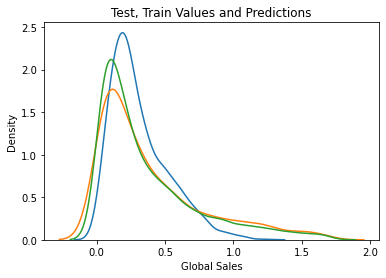

In [56]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); 
plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");



Predictions density is moved a little to the right, comparing to densities of initial values. The tail is also different. This might help tuning the model in the future.




Second graph is a histogram of residuals - differences between real values and predictions.


In [ ]:


basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");



# Advanced model

In [ ]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

# for platform

In [ ]:
donut_chart(data["Platform"])
plt.title("Platforms")
plt.axis("equal");

In [ ]:
data["Platform"].unique()


too many platform so we are going to group them.

In [ ]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [ ]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

In [ ]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))
donut_chart(data["Grouped_Platform"])
plt.title("Groups of platforms")
plt.axis("equal");

# for genre

In [ ]:
donut_chart(data["Genre"], palette="muted")
plt.title("Genres")
plt.axis("equal");

In [ ]:
scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))
donut_chart(scored["Grouped_Platform"])
plt.title("Groups of platforms for games with score")
plt.axis("equal");

In [ ]:


scored[scored["Grouped_Platform"]=="Other"]

